In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import splitfolders

In [26]:
# Import the Image folder from the PortDataset folder 

X = 'C:/Users/Amrita Dayal/Documents/Python Scripts/Portdataset'
output = 'ImageData'

#Split with a ratio of 80/20
splitfolders.ratio(X,output , seed=42, ratio=(0.8, 0.2), group_prefix=None)


Copying files: 1162 files [00:06, 171.90 files/s]


In [27]:
# define categories of the dataset

CATEGORIES = ["buoy", "cruise_ship", "ferry_boat","freight_boat","gondola","inflatable_boat", "kayak", "paper_boat","sailboat"]

In [25]:
# Step 2: Initialize ImageDataGenerator for train and test data with normalization

trainImageData = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0,validation_split=0.2)
testImageData = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)


In [30]:
# Step 3: Create train, validation, and test generators using the initialized ImageDataGenerator
# import necessary libraries
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = trainImageData.flow_from_directory('ImageData/train', batch_size=32, subset='training', shuffle=True,class_mode='categorical', #binary --- Binary Classification | categorical ---- Multi-class classification
                                                     target_size=(64,64))
val_generator = trainImageData.flow_from_directory('ImageData/train', batch_size=32, subset='validation', shuffle=True,class_mode='categorical', #binary --- Binary Classification | categorical ---- Multi-class classification
                                                     target_size=(64,64))
test_generator = testImageData.flow_from_directory('ImageData/val', batch_size=32, shuffle=False,class_mode='categorical', #binary --- Binary Classification | categorical ---- Multi-class classification
                                                     target_size=(64,64))




Found 922 images belonging to 9 classes.
Found 227 images belonging to 9 classes.
Found 722 images belonging to 9 classes.


In [31]:
#get the x_train and y_train from the Train_generator 

import tqdm
train_generator.reset()
X_train, y_train = next(train_generator)
for i in tqdm.tqdm(range(int(train_generator.n/32)-1)): 
  img, label = next(train_generator)
  X_train = np.append(X_train, img, axis=0 )
  y_train = np.append(y_train, label, axis=0)
print(X_train.shape, y_train.shape)


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:35<00:00,  1.31s/it]

(896, 64, 64, 3) (896, 9)


In [32]:
#Change the Datatype of data from float to Integer

X_train = (X_train * 255).astype(np.uint8)
y_train = (y_train * 255).astype(np.uint8)

In [33]:
train_generator.image_shape

(64, 64, 3)

In [36]:
from keras.layers import GlobalAveragePooling2D

model = tf.keras.Sequential()

# Two Convolutional Layer

#First Convolutional Layer
# Conv2D(noFeatureMaps, kernelShape, inputShape, activation)

model.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(64,64,3) , padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#Second Convolutional Layer
# Conv2D(noFeatureMaps, kernelShape, inputShape, activation)

model.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu",padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#Flatten
model.add(GlobalAveragePooling2D())
#model.add(tf.keras.layers.Flatten())

#FC(Fully Connected Layer) layer | ANN Layer

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=9, activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,041 (125.16 KB)

 Trainable params: 32,041 (125.16 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
#Compile
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
             metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [39]:
import os
checkpoint_path = "C:/Users/Amrita Dayal/Documents/Python Scripts/ImageDatacp.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [40]:
#Fit

#steps_per_epoch --- applicable for training data --- no_training_images/batchSize
#validation_steps --- applicable for testing data --- no_testing_images/batchSize

history = model.fit(train_generator,
          validation_data=val_generator,
          epochs=20,
          steps_per_epoch=int(len(train_generator.filenames) / train_generator.batch_size),
          validation_steps=int(len(val_generator.filenames) / val_generator.batch_size))

Epoch 1/20


D:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 42s 992ms/step - categorical_accuracy: 0.2800 - loss: 2.0351 - precision: 0.3280 - recall: 0.0073 - val_categorical_accuracy: 0.3348 - val_loss: 1.8046 - val_precision: 1.0000 - val_recall: 0.0134
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - categorical_accuracy: 0.3125 - loss: 1.7410 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_categorical_accuracy: 0.3333 - val_loss: 1.5582 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20


D:\anaconda\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


28/28 ━━━━━━━━━━━━━━━━━━━━ 26s 763ms/step - categorical_accuracy: 0.3296 - loss: 1.8035 - precision: 0.8908 - recall: 0.0096 - val_categorical_accuracy: 0.3348 - val_loss: 1.7788 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.2188 - loss: 1.9363 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_categorical_accuracy: 0.3333 - val_loss: 2.3465 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 26s 772ms/step - categorical_accuracy: 0.3186 - loss: 1.8125 - precision: 0.8343 - recall: 0.0038 - val_categorical_accuracy: 0.3393 - val_loss: 1.7764 - val_precision: 1.0000 - val_recall: 0.0223
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.5312 - loss: 1.5090 - precision: 1.0000 - recall: 0.0312 - val_categorical_accuracy: 0.0000e+00 - val_loss: 1.6439 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 27s

In [41]:
# saving the pre-trained model
model.save(r"C:/Users/Amrita Dayal/Documents/Python Scripts/ImageData/mymodel1.keras")

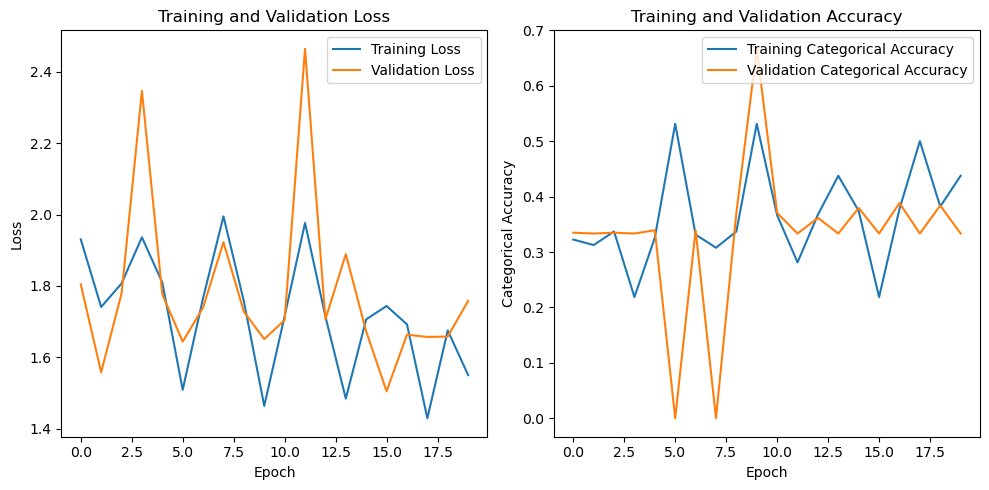

In [42]:
# Plot training loss and accuracy against epochs
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['categorical_accuracy'], label='Training Categorical Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Categorical Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Categorical Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
# Evaluate the model on test data
testImageData = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

test_generator = testImageData.flow_from_directory('ImageData/test',
                                                     batch_size=32, #How many images to pass per tick
                                                     class_mode='categorical', #binary --- Binary Classification | categorical ---- Multi-class classification
                                                     target_size=(64,64))

loss, accuracy = model.evaluate(test_generator)

# Print the loss and accuracy
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Found 123 images belonging to 9 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 885ms/step - categorical_accuracy: 0.3629 - loss: 1.7633 - precision: 0.6500 - recall: 0.0741


ValueError: too many values to unpack (expected 2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 700ms/step


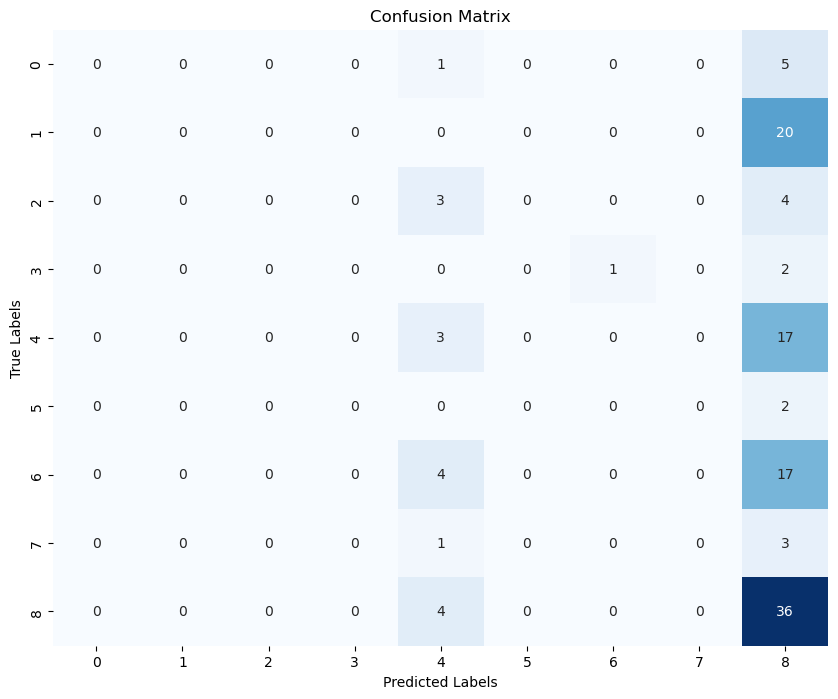

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         3
           4       0.19      0.15      0.17        20
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00         4
           8       0.34      0.90      0.49        40

    accuracy                           0.32       123
   macro avg       0.06      0.12      0.07       123
weighted avg       0.14      0.32      0.19       123



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have already trained your model and loaded the test data

# Make predictions on the test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels from the test generator
y_true = test_generator.classes

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(y_true, y_pred_classes))

In [45]:
#Split with a ratio
splitfolders.ratio(input_folder, output=output_folder, seed=1, ratio=(0.7, 0.3), group_prefix=None)


Copying files: 1162 files [00:07, 147.64 files/s]


In [46]:
# ImageGenerators

trainImageData2 = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0,validation_split=0.2)
valImageData2 = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

In [47]:
train_generator2 = trainImageData2.flow_from_directory('ImageData/train',
                                                     batch_size=32, #How many images to pass per tick
                                                     class_mode='categorical', #binary --- Binary Classification | categorical ---- Multi-class classification
                                                     target_size=(224,224))

val_generator2 = valImageData2.flow_from_directory('ImageData/val',
                                                     batch_size=32, #How many images to pass per tick
                                                     class_mode='categorical', #binary --- Binary Classification | categorical ---- Multi-class classification
                                                     target_size=(224,224))

Found 1149 images belonging to 9 classes.
Found 722 images belonging to 9 classes.


In [48]:
import tqdm
train_generator2.reset()
X_train, y_train = next(train_generator2)
for i in tqdm.tqdm(range(int(train_generator2.n/32)-1)): 
  img, label = next(train_generator2)
  X_train = np.append(X_train, img, axis=0 )
  y_train = np.append(y_train, label, axis=0)
print(X_train.shape, y_train.shape)

100%|██████████████████████████████████████████████████████████████████████████████████| 34/34 [00:51<00:00,  1.51s/it]


(1120, 224, 224, 3) (1120, 9)


In [49]:
X_train = (X_train * 255).astype(np.uint8)
y_train = (y_train * 255).astype(np.uint8)

In [50]:
train_generator2.image_shape

(224, 224, 3)

In [51]:
from keras.models import Model
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras.applications import MobileNetV2

# Load MobileNetV2 - Light Model as the first layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the MobileNetV2 base model
base_model.trainable = False

# Add layers on top of MobileNetV2
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
output = Dense(9, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Print model summary
model.summary()



Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,621,513 (10.00 MB)

 Trainable params: 362,761 (1.38 MB)

 Non-trainable params: 2,258,752 (8.62 MB)

In [52]:

#To compile the model with the specified optimizer, loss function, and metrics, you can use the compile method in Keras. Here's how you can do it:

from keras.optimizers import Adam
from keras.metrics import Accuracy, Precision, Recall

# Compile the model
model.compile(optimizer=Adam(), 
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

In [53]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_generator2,
                    epochs=50,
                    validation_data=val_generator2,
                    callbacks=[early_stopping])

Epoch 1/50


D:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.4785 - loss: 1.7250 - precision_1: 0.6203 - recall_1: 0.3816 - val_accuracy: 0.8449 - val_loss: 0.4729 - val_precision_1: 0.9141 - val_recall_1: 0.7964
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.8745 - loss: 0.4005 - precision_1: 0.9278 - recall_1: 0.8151 - val_accuracy: 0.9183 - val_loss: 0.2689 - val_precision_1: 0.9478 - val_recall_1: 0.8795
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - accuracy: 0.9171 - loss: 0.2774 - precision_1: 0.9336 - recall_1: 0.8802 - val_accuracy: 0.9765 - val_loss: 0.1436 - val_precision_1: 0.9829 - val_recall_1: 0.9543
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.9521 - loss: 0.1737 - precision_1: 0.9622 - recall_1: 0.9272 - val_accuracy: 0.9861 - val_loss: 0.0996 - val_precision_1: 0.9861 - val_recall_1: 0.9806
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.9590 - loss: 0.1315 - precision_1: 0.9701 - recall_1: 0.9497 - val_accuracy: 0.99

In [55]:
# saving the pre-trained model
model.save(r"C:/Users/Amrita Dayal/Documents/Python Scripts/ImageData/mymodel2.keras")

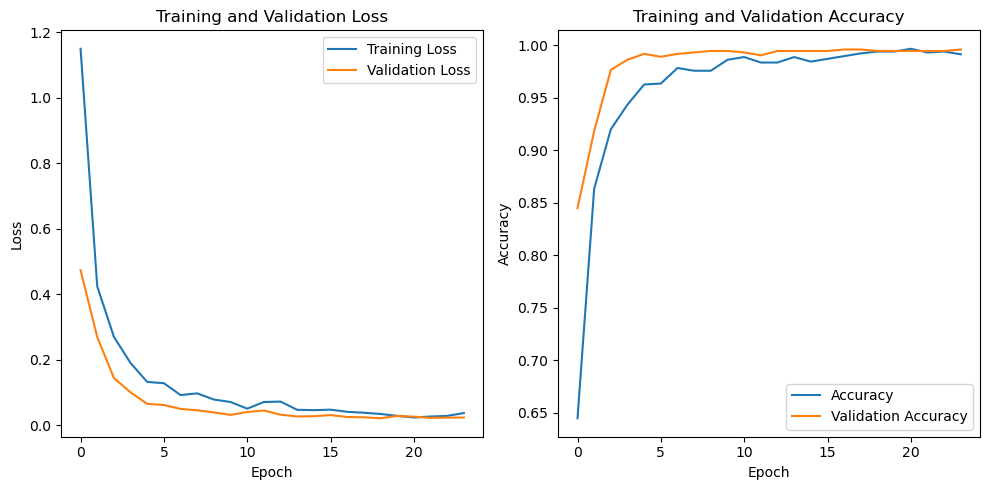

In [58]:
# Plot training loss and accuracy against epochs
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [60]:
# Evaluate the model on test data
testImageData = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

test_generator = testImageData.flow_from_directory('ImageData/test',
                                                     batch_size=32, #How many images to pass per tick
                                                     class_mode='categorical', #binary --- Binary Classification | categorical ---- Multi-class classification
                                                     target_size=(64,64))

loss, accuracy = model.evaluate(test_generator)

# Print the loss and accuracy
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Found 123 images belonging to 9 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 494ms/step - accuracy: 0.4139 - loss: 3.2813 - precision_1: 0.4514 - recall_1: 0.4001


ValueError: too many values to unpack (expected 2)

In [ ]:
my observation is for the both the model is below

Model Outputs:

Model	                 Parameters Trained	         Accuracy
CNN-COV 2D	               32,041	                 36
Pre-Trained - Mobilenet	   362,761	                 41     
